# MOVIE RATING PREDICTION WITH PYTHON 

 ### This code uses RFR (RANDOM FOREST REGRESSION ) to find the best results o predict movie ratings based on various movie-related features, and it provides visualizations to help understand the model's performance and feature importance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## Load the dataset

In [3]:
data = pd.read_csv("IMDB Movies India.csv")

## Data Preprocessing

In [4]:
# Extract the year from 'Year' and convert it to integers
data['Year'] = data['Year'].str.extract('(\d+)').astype(int)

# Convert 'Duration' column to integers
data['Duration'] = data['Duration'].astype(int)

# Split the 'Genre' column into binary variables using one-hot encoding
genres = data['Genre'].str.get_dummies(', ')
data = pd.concat([data, genres], axis=1)
data.drop('Genre', axis=1, inplace=True)

# Encode categorical variables: 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
label_encoders = {}
categorical_cols = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

## Define the features and target variable

In [5]:
X = data.drop(['Name', 'Rating', 'Votes'], axis=1)
y = data['Rating']

## Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Initialize and train the Random Forest Regression model

In [7]:
model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

## Get the best model from the random search

In [8]:
best_model = random_search.best_estimator_

## Make predictions on the test set

In [9]:
y_pred = best_model.predict(X_test)

## Evaluate the model

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {random_search.best_params_}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Best Model Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Mean Absolute Error: 0.91
Mean Squared Error: 1.38
Root Mean Squared Error: 1.17
R-squared (R2) Score: 0.26


## Visualize feature importances

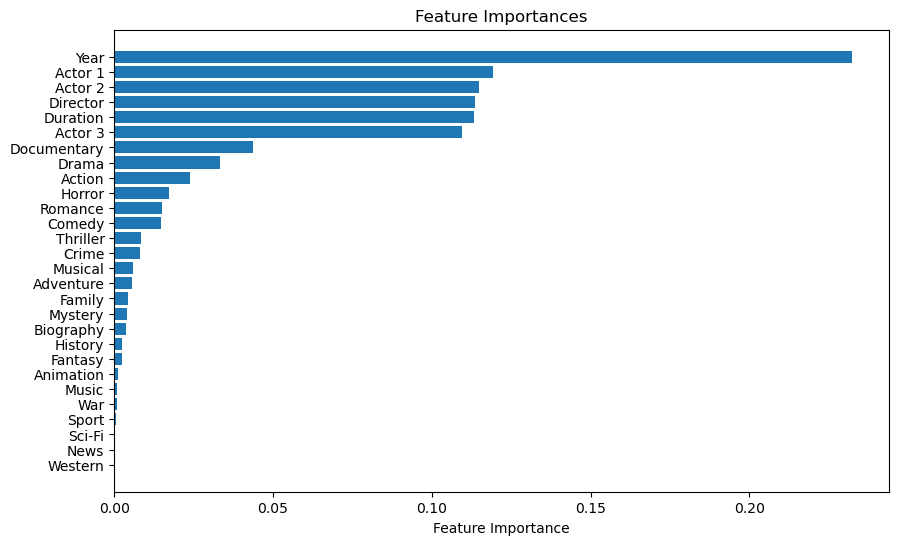

In [11]:
feature_importances = best_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

## Distribution plot of actual vs. predicted ratings

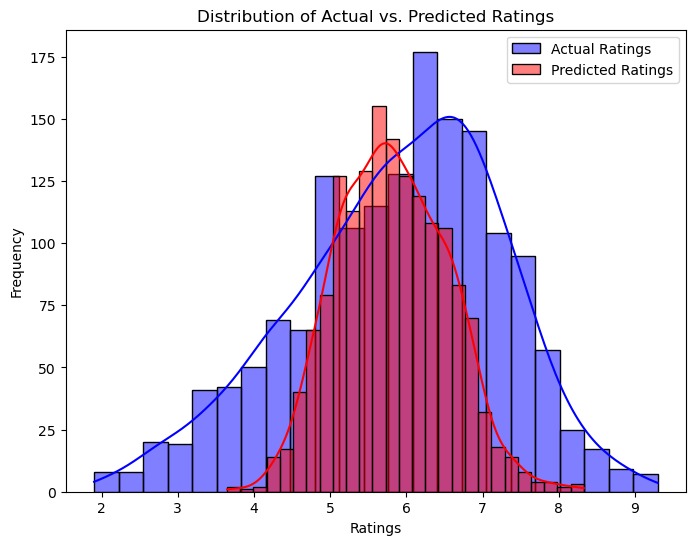

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color='blue', label='Actual Ratings', kde=True)
sns.histplot(y_pred, color='red', label='Predicted Ratings', kde=True)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Ratings')
plt.legend()
plt.show()

## Scatter plot of actual vs. predicted ratings

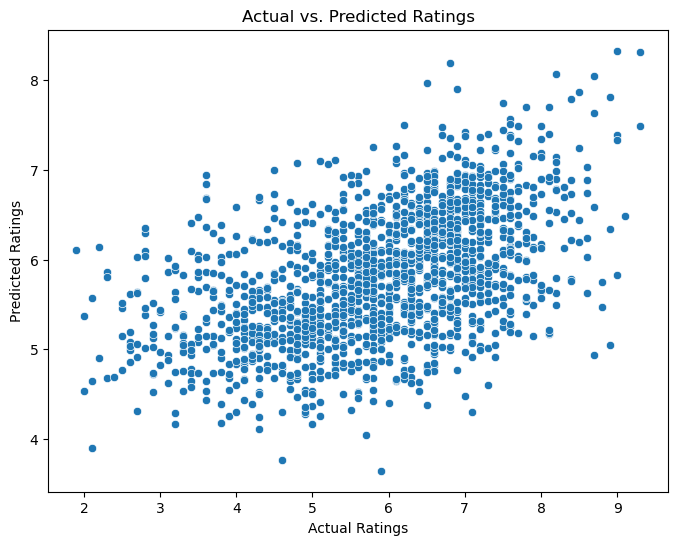

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()

## Pair plot of selected features and ratings

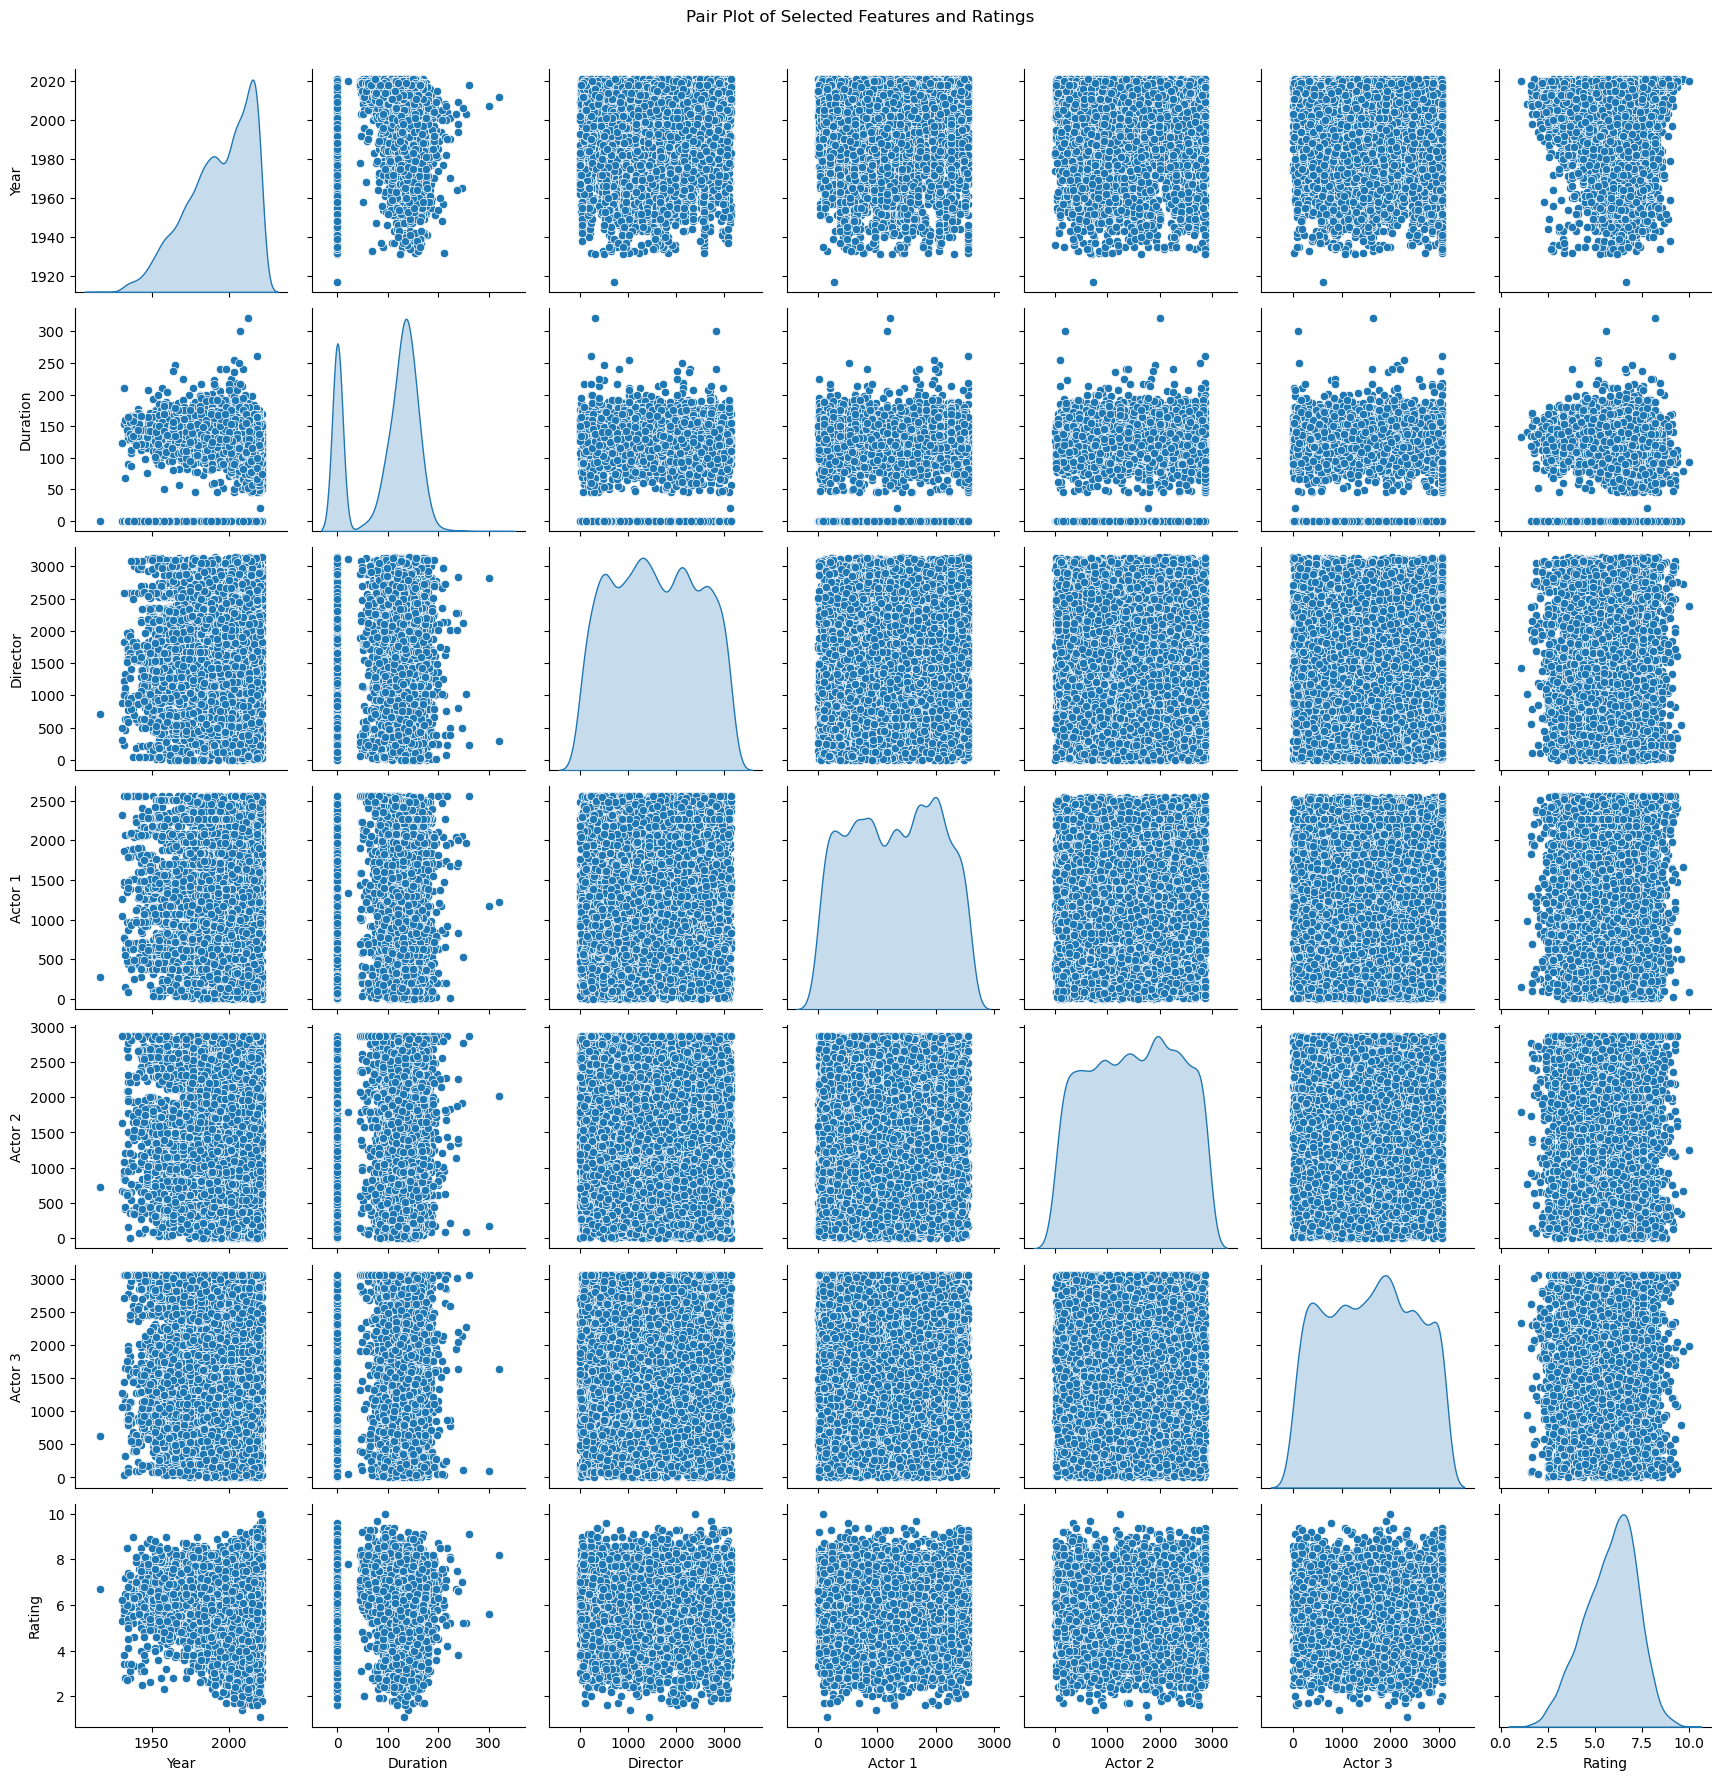

In [14]:
selected_features = ['Year', 'Duration', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']

sns.pairplot(data[selected_features], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features and Ratings', y=1.02)
plt.show()
